# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:

Import the necessary libraries and create your dataframe(s).

In [156]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# read csv file 
df=pd.read_csv("healthcare-dataset-stroke-data 2.csv")
print(df.shape)
df.info()



(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [105]:
# looking for missing values in dataset.
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}- {}%'.format(col,round(pct_missing*100)))
    print(df.shape)

id- 0%
(5110, 12)
gender- 0%
(5110, 12)
age- 0%
(5110, 12)
hypertension- 0%
(5110, 12)
heart_disease- 0%
(5110, 12)
ever_married- 0%
(5110, 12)
work_type- 0%
(5110, 12)
Residence_type- 0%
(5110, 12)
avg_glucose_level- 0%
(5110, 12)
bmi- 4%
(5110, 12)
smoking_status- 0%
(5110, 12)
stroke- 0%
(5110, 12)


In [106]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

(5110, 12)


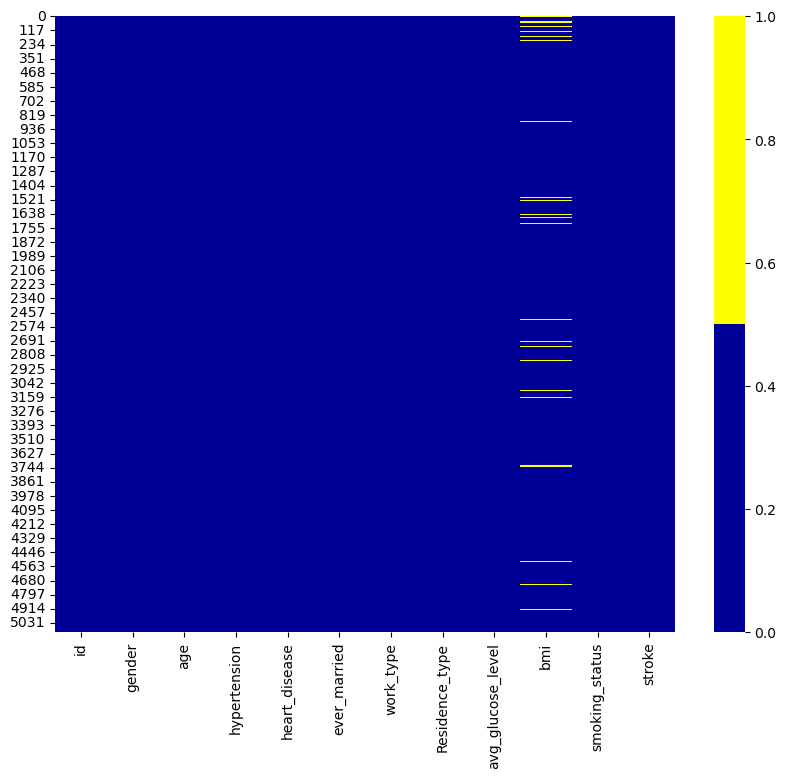

In [107]:
# showing missing value through heat map.
plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))
print(df.shape)

In [138]:
 # since missing values in data are on field "bmi"only that to it looks vary less in percentile ,i want replace missing values with mean.
df=df.fillna(df["bmi"].mean())
print(df.isna().sum())
print(df.shape)


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
(5110, 12)


(5110, 12)


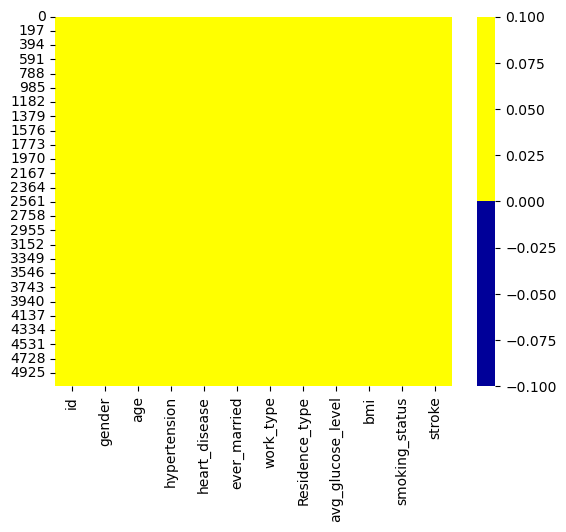

In [122]:
cols = df.columns[:] # all columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
print(df.shape)

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [73]:
# # Plot a histogram to see if there are any outliers.
# df_missing.kurt(numeric_only=True)[:10]
# df_missing.hist(bins=40)


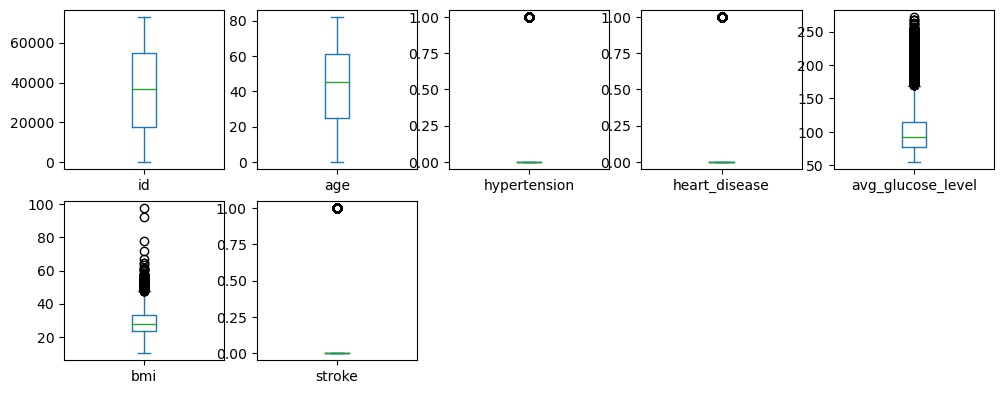

In [128]:
# as in the above observation  cannot see the outliers that much clerly i used box plot to detect outliers.
ax_array = df.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))

plt.show()

In [129]:
# we observed outliers mostly in "bmi"column of datset,since we handle the outliers in"bmi" coulmn by their respective values.
df['bmi'].max()



97.6

In [130]:
print("outliers:" , df[(df['bmi'] >= 65)].count())
print(df.shape)

outliers: id                   5
gender               5
age                  5
hypertension         5
heart_disease        5
ever_married         5
work_type            5
Residence_type       5
avg_glucose_level    5
bmi                  5
smoking_status       5
stroke               5
dtype: int64
(5110, 12)


In [131]:
df=df[(df['bmi'] < 60)]


In [132]:
print("outliers:",df[(df["bmi"] >=55)].count())

outliers: id                   22
gender               22
age                  22
hypertension         22
heart_disease        22
ever_married         22
work_type            22
Residence_type       22
avg_glucose_level    22
bmi                  22
smoking_status       22
stroke               22
dtype: int64


In [92]:
df=df[(df["bmi"]<=55)]

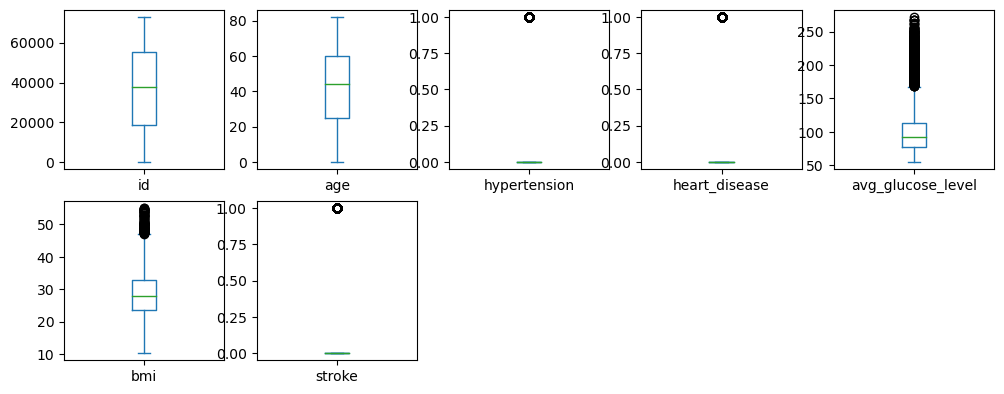

In [93]:
ax_array = df.plot(kind="box", subplots=True, figsize=(12, 12), layout=(5, 5))
plt.show()

In [133]:
# checking for duplicates and dropping duplicates which  may srew  up the analysis.
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [139]:
# i feel id column is irrelvant to dataset i want to drop the column

df.drop(columns=['id'],inplace=True) 
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [157]:
# Convert Marital Status, Residence and Gender into 0's and 1's
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
 
df.shape

(5110, 12)

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
yes i find all types of data in my dataset  except dqate datatype
2. Did the process of cleaning your data give you new insights into your dataset?
yes i got my insights to find through this dataset.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
coming to data manupla